In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Load dataset
df = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')

# Convert date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
# Aggregate sales by month across all stores/items
df = df.groupby(pd.Grouper(key='Order Date', freq='ME')).sum().reset_index()

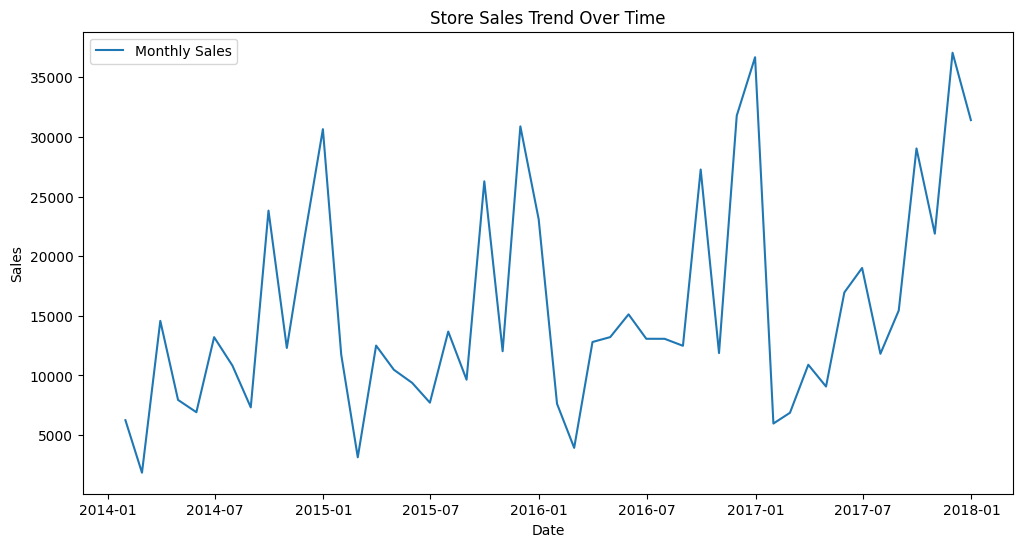

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Order Date'], df['Sales'], label='Monthly Sales')
plt.title("Store Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

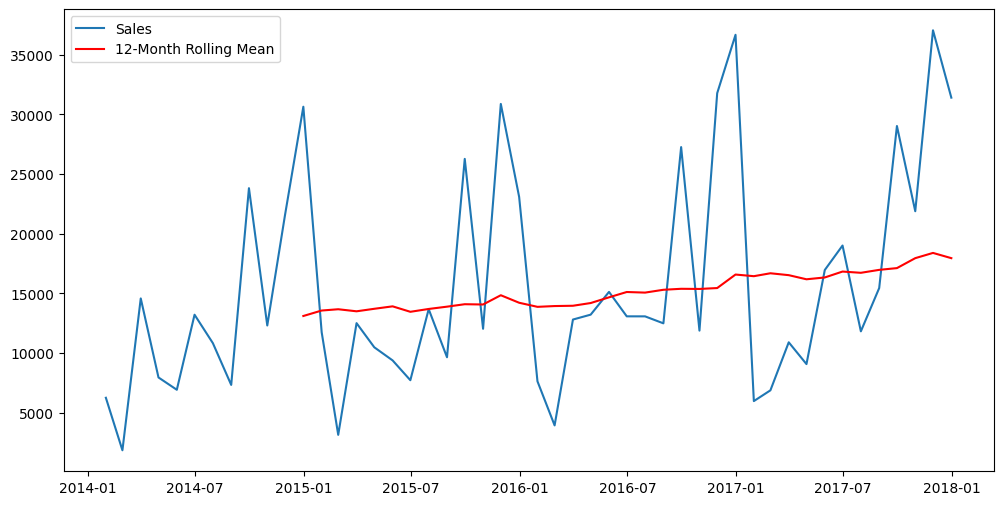

In [11]:
df['rolling_mean'] = df['Sales'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Order Date'], df['Sales'], label='Sales')
plt.plot(df['Order Date'], df['rolling_mean'], label='12-Month Rolling Mean', color='red')
plt.legend()
plt.show()

In [12]:
train = df.iloc[:-12]   # all data except last 12 months
test = df.iloc[-12:]    # last 12 months

In [14]:
model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

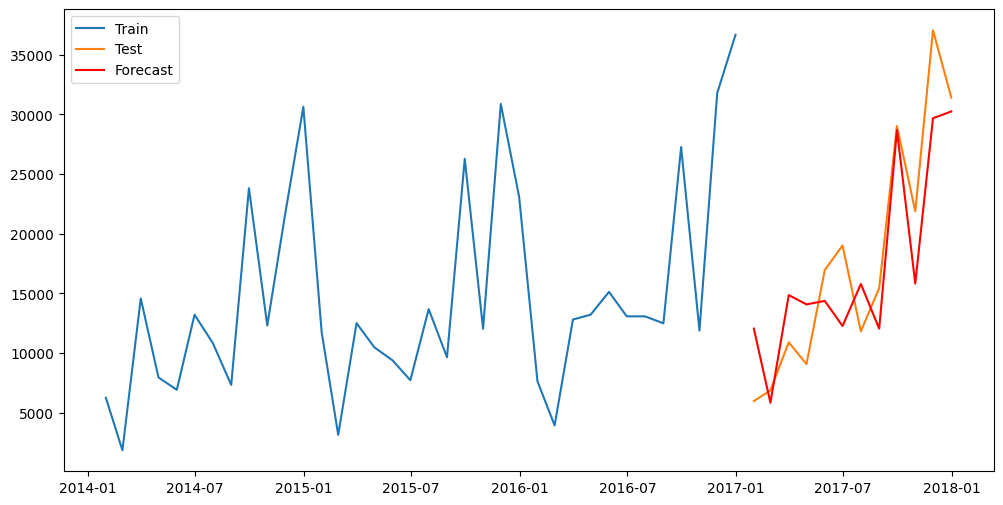

In [16]:
forecast = fit.forecast(len(test))

plt.figure(figsize=(12,6))
plt.plot(train['Order Date'], train['Sales'], label='Train')
plt.plot(test['Order Date'], test['Sales'], label='Test')
plt.plot(test['Order Date'], forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [18]:
mae = mean_absolute_error(test['Sales'], forecast)
mape = mean_absolute_percentage_error(test['Sales'], forecast)

print("MAE:", mae)
print("MAPE:", mape)

MAE: 3979.847271439079
MAPE: 0.30640972528222143


In [20]:
forecast_df = pd.DataFrame({
    'date': test['Order Date'],
    'actual_sales': test['Sales'],
    'forecast_sales': forecast
})

forecast_df.to_csv("forecast_output.csv", index=False)

with open("forecast_report.txt", "w") as f:
    f.write("Forecasting Report\n")
    f.write("=================\n")
    f.write(f"Model: Exponential Smoothing\n")
    f.write(f"MAE: {mae}\n")
    f.write(f"MAPE: {mape}\n")
    f.write("Observations: The model captures seasonality and trend. Forecast reliability depends on data quality.\n")